<a href="https://colab.research.google.com/github/hyeongguWon/Portfolio/blob/master/Ferrous_Metallurgy_ghraph_drawing_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

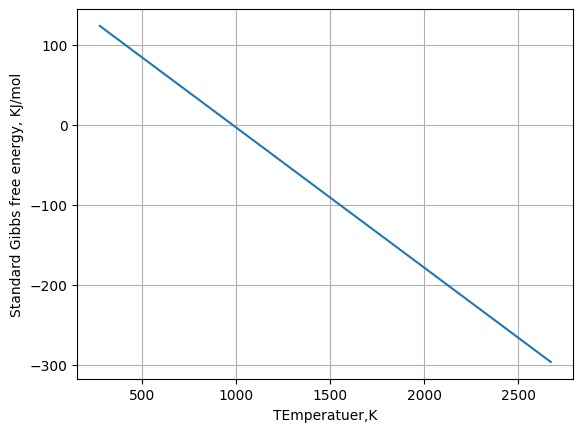

In [14]:
# 온도변화에 따른 Gibbs free energy 변화 그래프는 다음과 같이 표현될 수 있다.

import numpy as np
import matplotlib.pyplot as plt
T=np.linspace(0,2400, 100)
#print(T)
R=8.314
K=T+273
G0=171660-175.02*K
#print(G0)

plt.plot(K, G0/1000)
plt.xlabel('TEmperatuer,K')
plt.ylabel('Standard Gibbs free energy, KJ/mol')
plt.grid()
plt.show()



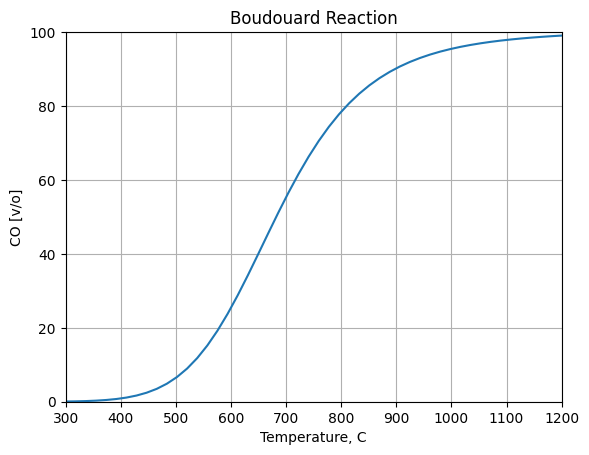

In [21]:
# Boudouard Reaction 그래프는 다음과 같이 나타낼 수 있다.

import numpy as np
import matplotlib.pyplot as plt

n=50
CO=np.linspace(0.1,0.9,n)
C=np.linspace(300,1200,n)
K=C+273
# print(C0)
#C0+C02=1
CO2=1-CO
# print(CO2)
CO_1=(CO2*10**(-8969/K+9.14))**0.5
# print(CO_1)
COv=CO_1/(CO_1+CO2)*100
plt.plot(C,COv)
plt.grid()
plt.ylim(0,100)
plt.xlim(300,1200)
plt.xlabel('Temperature, C')
plt.ylabel('CO [v/o]')
plt.title('Boudouard Reaction')
plt.show()

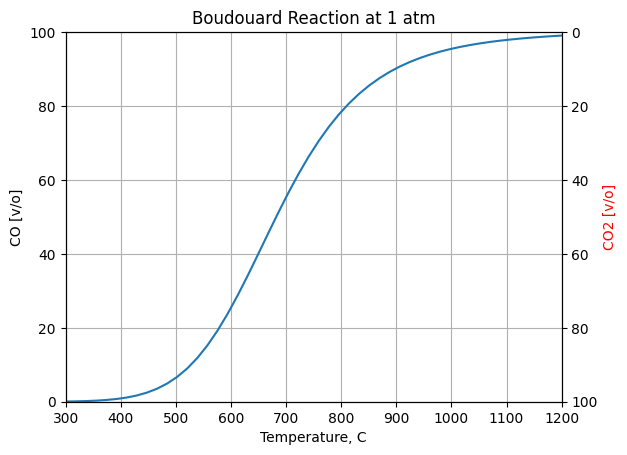

In [38]:
# Pressure Change

import numpy as np
import matplotlib.pyplot as plt

n=50
CO_01=np.linspace(0.01,0.09,n)
CO_03=np.linspace(0.01,0.29,n)
CO=np.linspace(0.1,0.9,n)
CO_3=np.linspace(0.1,2.9,n)
CO_10=np.linspace(0.1,9.9,n)

C=np.linspace(300,1200,n)
K=C+273

# print(C0)
#C0+C02=1
CO2=1-CO
# print(CO2)
CO_1=(CO2*10**(-8969/K+9.14))**0.5
# print(CO_1)
COv=CO_1/(CO_1+CO2)*100

fig,ax1=plt.subplots()
plt.plot(C,COv)
plt.grid()
ax1.set_ylim(0,100)
ax1.set_xlim(300,1200)
plt.xlabel('Temperature, C')
plt.ylabel('CO [v/o]')
plt.title('Boudouard Reaction at 1 atm')

# Create a second y-axis on the right side of the plot
ax2 = ax1.twinx()
ax2.set_ylabel('CO2 [v/o]', color='red')
ax2.set_ylim(100,0)
plt.show()


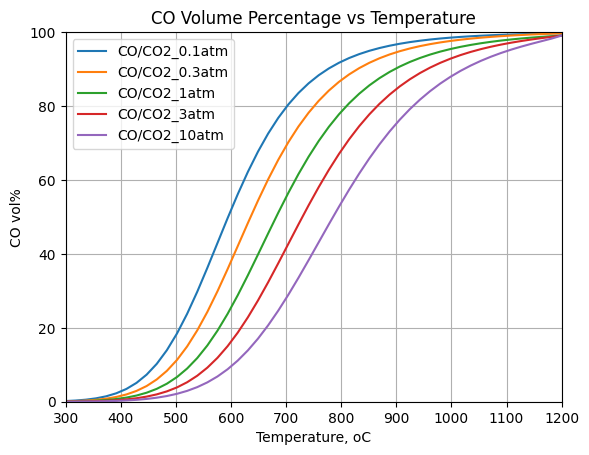

In [55]:
# pressure change

import matplotlib.pyplot as plt
import numpy as np

def CO_v_p(COi_initial_range, total_pressure, temperature, n):
    COi = np.linspace(COi_initial_range[0],COi_initial_range[1], n )
    CO2i = total_pressure-COi
    K=temperature + 273
    CO = (CO2i*10**(-8969/K+9.14))**0.5
    CO_volume_percentage = CO/(CO+CO2i)*100
    return CO_volume_percentage

def CO_v_p_all(pressure_conditions, temperature_range, n):
    CO_volume_percentages = []
    for initial_range, pressure in pressure_conditions:
        CO_volume_percentage = CO_v_p(initial_range, pressure, temperature_range, n)
        CO_volume_percentages.append(CO_volume_percentage)
    return CO_volume_percentages


def plot_CO_v(temperatures, CO_volume_percentages, labels, xlabel, ylabel, title):
    for CO_volume_percentage, label in zip(CO_volume_percentages, labels):
        plt.plot(temperatures, CO_volume_percentage, '-', label=label)

    plt.ylim(0, 100)
    plt.xlim(300, 1200)
    plt.legend()
    plt.grid()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

n=50

temperatures = np.linspace(300, 1200, n)
pressure_conditions = [
    ([0.01, 0.09], 0.1),
    ([0.01, 0.29], 0.3),
    ([0.1, 0.9], 1),
    ([0.1, 2.9], 3),
    ([0.1, 9.9], 10)
]
CO_volume_percentages=CO_v_p_all(pressure_conditions, temperatures, n )

labels = ["CO/CO2_0.1atm", "CO/CO2_0.3atm", "CO/CO2_1atm","CO/CO2_3atm","CO/CO2_10atm" ]

plot_CO_v(temperatures, CO_volume_percentages, labels, 'Temperature, oC', 'CO vol%', 'CO Volume Percentage vs Temperature')
